In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

n_pts = 500
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

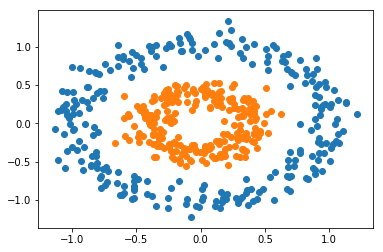

In [2]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])
    
scatter_plot()

In [3]:
class Model(nn.Module):
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)
    
    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x

    def predict(self, x):
        pred = self.forward(x)
        return 1 if pred >= 0.5 else 0


In [4]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [5]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print('epoch:', i, 'loss', loss.item())
    
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

epoch: 0 loss 0.7148510813713074
epoch: 1 loss 0.6947270035743713
epoch: 2 loss 0.6955180764198303
epoch: 3 loss 0.7015023231506348
epoch: 4 loss 0.7014189958572388
epoch: 5 loss 0.697501540184021
epoch: 6 loss 0.6939656138420105
epoch: 7 loss 0.6929098963737488
epoch: 8 loss 0.6940106153488159
epoch: 9 loss 0.6955495476722717
epoch: 10 loss 0.6960417628288269
epoch: 11 loss 0.6951603293418884
epoch: 12 loss 0.6934977173805237
epoch: 13 loss 0.6918858289718628
epoch: 14 loss 0.6908693313598633
epoch: 15 loss 0.6904599666595459
epoch: 16 loss 0.6902322173118591
epoch: 17 loss 0.6896448135375977
epoch: 18 loss 0.6883751749992371
epoch: 19 loss 0.6864374876022339
epoch: 20 loss 0.6840725541114807
epoch: 21 loss 0.6815589070320129
epoch: 22 loss 0.6790528297424316
epoch: 23 loss 0.6765346527099609
epoch: 24 loss 0.6738494038581848
epoch: 25 loss 0.6708071231842041
epoch: 26 loss 0.6672759056091309
epoch: 27 loss 0.663235068321228
epoch: 28 loss 0.6587450504302979
epoch: 29 loss 0.653891682

epoch: 411 loss 0.02341430075466633
epoch: 412 loss 0.023358283564448357
epoch: 413 loss 0.02330252341926098
epoch: 414 loss 0.023246992379426956
epoch: 415 loss 0.02319173328578472
epoch: 416 loss 0.023136723786592484
epoch: 417 loss 0.023081986233592033
epoch: 418 loss 0.02302747778594494
epoch: 419 loss 0.022973207756876945
epoch: 420 loss 0.02291920594871044
epoch: 421 loss 0.022865433245897293
epoch: 422 loss 0.0228118933737278
epoch: 423 loss 0.022758610546588898
epoch: 424 loss 0.022705554962158203
epoch: 425 loss 0.02265273779630661
epoch: 426 loss 0.022600164636969566
epoch: 427 loss 0.02254779264330864
epoch: 428 loss 0.022495679557323456
epoch: 429 loss 0.022443773224949837
epoch: 430 loss 0.022392097860574722
epoch: 431 loss 0.02234066091477871
epoch: 432 loss 0.02228943631052971
epoch: 433 loss 0.022238444536924362
epoch: 434 loss 0.022187650203704834
epoch: 435 loss 0.022137081250548363
epoch: 436 loss 0.02208673022687435
epoch: 437 loss 0.02203659527003765
epoch: 438 los

epoch: 640 loss 0.015021265484392643
epoch: 641 loss 0.014997588470578194
epoch: 642 loss 0.014973979443311691
epoch: 643 loss 0.014950450509786606
epoch: 644 loss 0.014926985837519169
epoch: 645 loss 0.014903591014444828
epoch: 646 loss 0.014880276285111904
epoch: 647 loss 0.014857036992907524
epoch: 648 loss 0.01483385544270277
epoch: 649 loss 0.014810758642852306
epoch: 650 loss 0.014787723310291767
epoch: 651 loss 0.01476476714015007
epoch: 652 loss 0.014741870574653149
epoch: 653 loss 0.014719048514962196
epoch: 654 loss 0.014696291647851467
epoch: 655 loss 0.014673611149191856
epoch: 656 loss 0.01465099211782217
epoch: 657 loss 0.014628439210355282
epoch: 658 loss 0.01460595615208149
epoch: 659 loss 0.014583542943000793
epoch: 660 loss 0.014561200514435768
epoch: 661 loss 0.014538909308612347
epoch: 662 loss 0.01451670378446579
epoch: 663 loss 0.014494560658931732
epoch: 664 loss 0.0144724790006876
epoch: 665 loss 0.01445046253502369
epoch: 666 loss 0.01442850660532713
epoch: 667

Text(0.5, 0, 'ecpoch')

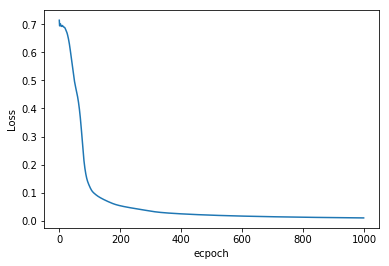

In [6]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('ecpoch')

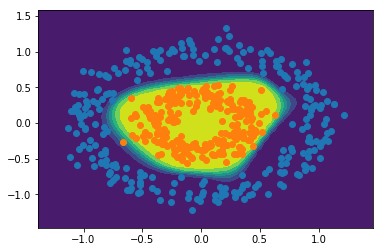

In [18]:
def plot_decision_boundary(X, y):
    tolerance = 0.25
    x_span = np.linspace(min(X[:,0]) -tolerance, max(X[:,0]) +tolerance)
    # print(x_span)
    y_span = np.linspace(min(X[:,1]) -tolerance, max(X[:,1]) +tolerance)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, z)
    #print(xx, '\n')
    #print(yy)

plot_decision_boundary(X, y)
scatter_plot()

Prediction is 1


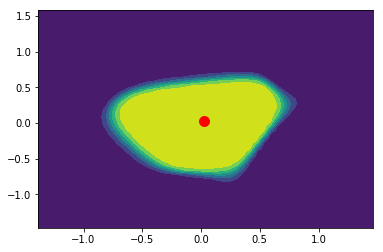

In [21]:
x = 0.025
y = 0.025
point = torch.Tensor([x,y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print('Prediction is', prediction)
plot_decision_boundary(X, y)